In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
file_path = '../Data/daily_weather_data.csv'
df = pd.read_csv(file_path)

In [3]:
# Convertir la columna de fecha a formato datetime
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Mostrar estadísticas resumidas
display("Estadísticas Resumidas:\n", df.describe())

'Estadísticas Resumidas:\n'

,date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,2019-07-02 12:00:00,16.481207,8.312834,12.229021,3.784118,3.510296,0.191791,21.768977,39.833822
min,2017-01-01 00:00:00,-12.927500,-20.727500,-14.902500,0.000000,0.000000,0.000000,6.638072,13.679999
25%,2018-04-02 06:00:00,8.435000,0.335000,4.306354,0.000000,0.000000,0.000000,16.750640,30.960001
50%,2019-07-02 12:00:00,16.897499,8.272500,12.199583,0.200000,0.100000,0.000000,20.534202,37.440000
75%,2020-09-30 18:00:00,24.909999,16.772500,20.869895,3.400000,2.900000,0.000000,25.747543,46.800000
max,2021-12-31 00:00:00,35.722500,25.472500,29.755829,111.500000,111.500000,30.800001,60.356660,113.399994
std,NaN,9.675701,9.361358,9.357387,8.203865,7.924096,1.513336,7.239209,13.029331


In [5]:
# Visualizar valores faltantes
missing_values = df.isnull().sum()
print("\nValores Faltantes:\n", missing_values)


Valores Faltantes:
 date                   0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
precipitation_sum      0
rain_sum               0
snowfall_sum           0
wind_speed_10m_max     0
wind_gusts_10m_max     0
dtype: int64


In [6]:
# Visualizar duplicados
duplicates = df.duplicated().sum()
print("\nDuplicados:\n", duplicates)


Duplicados:
 0


In [7]:
# Eliminar la columna de fecha para la matriz de correlación
df_numerical = df.drop(columns=['date'])

# Matriz de correlación
correlation_matrix = df_numerical.corr()

# Identificar outliers utilizando el método IQR
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR))).sum()

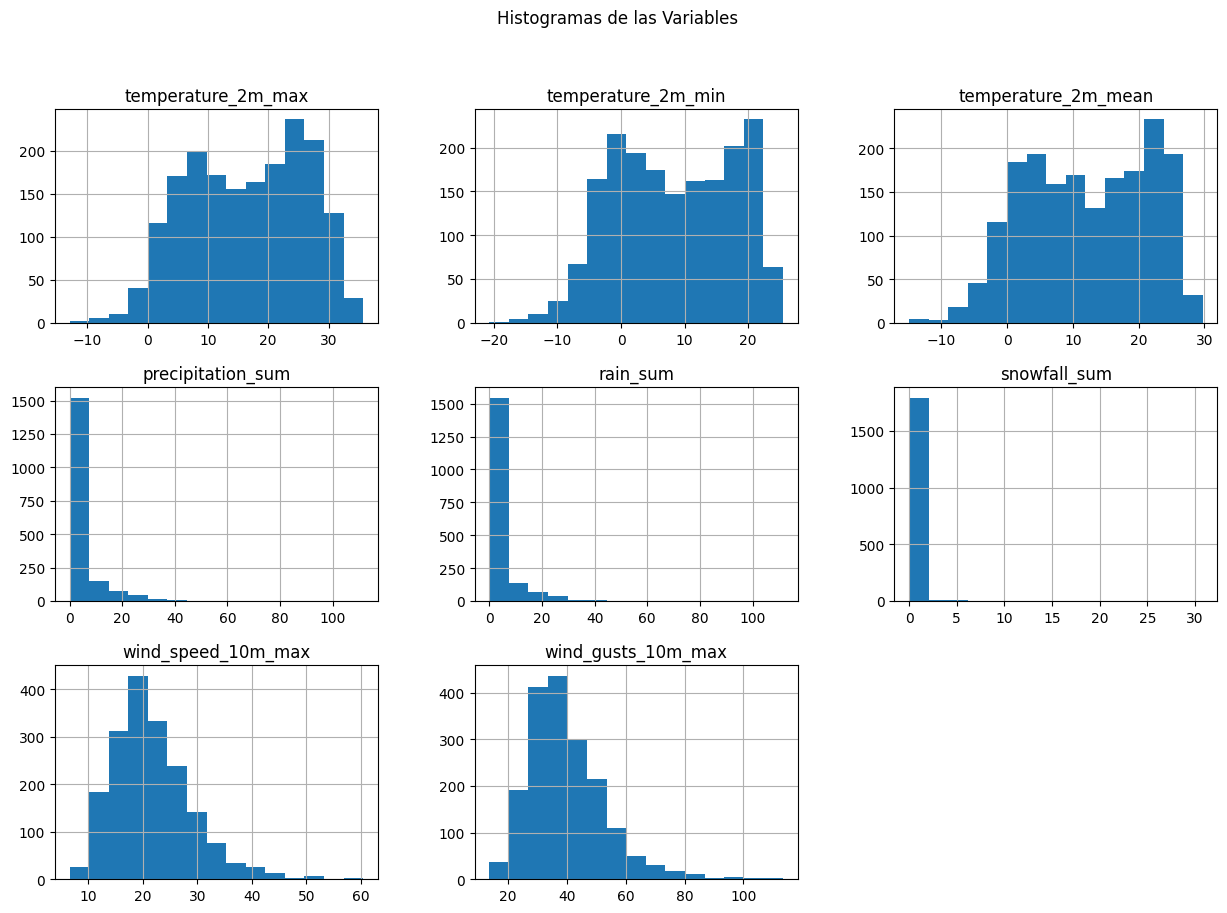

In [8]:
# Histograma de las variables
df_numerical.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogramas de las Variables')  # Ayuda a entender la distribución de cada variable
plt.show()

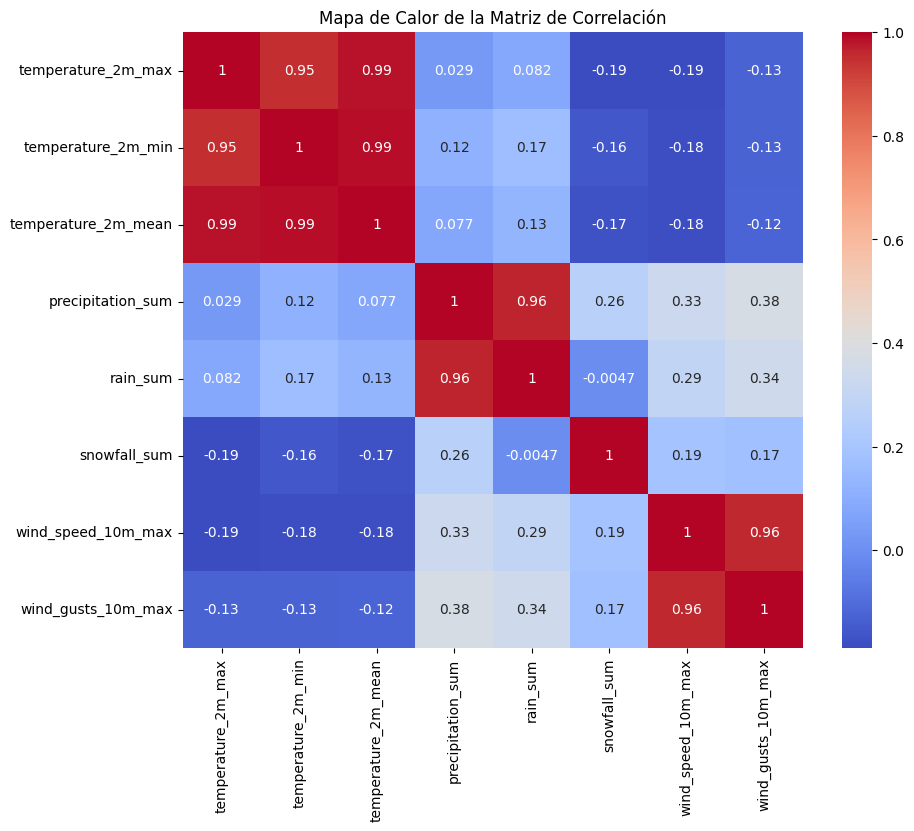

In [9]:
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación') # Visualiza relaciones entre variables
plt.show()



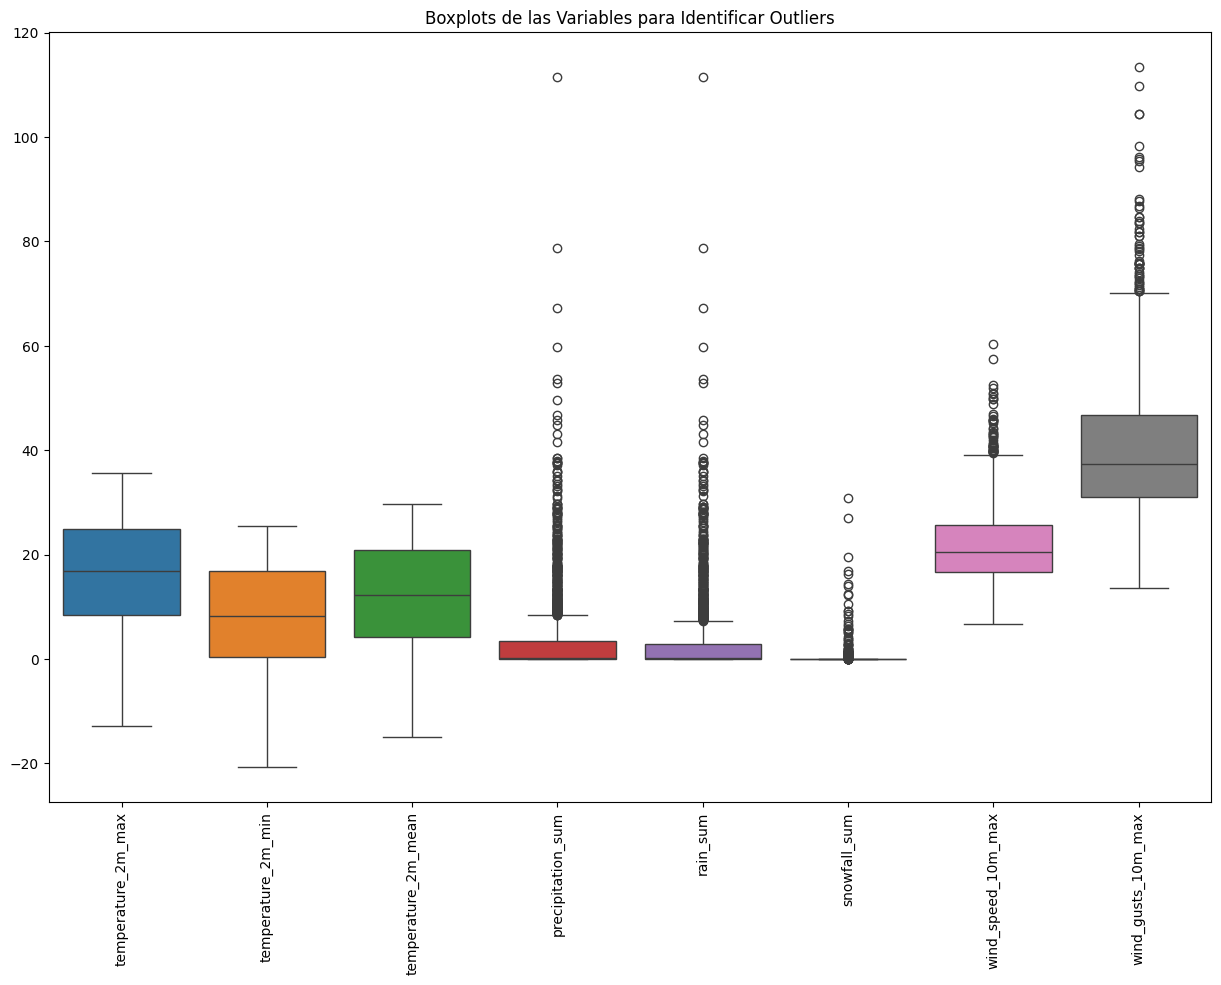

In [10]:
# Boxplot para identificar outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numerical)
plt.title('Boxplots de las Variables para Identificar Outliers')  # Detectar outliers y entender la dispersión
plt.xticks(rotation=90)
plt.show()

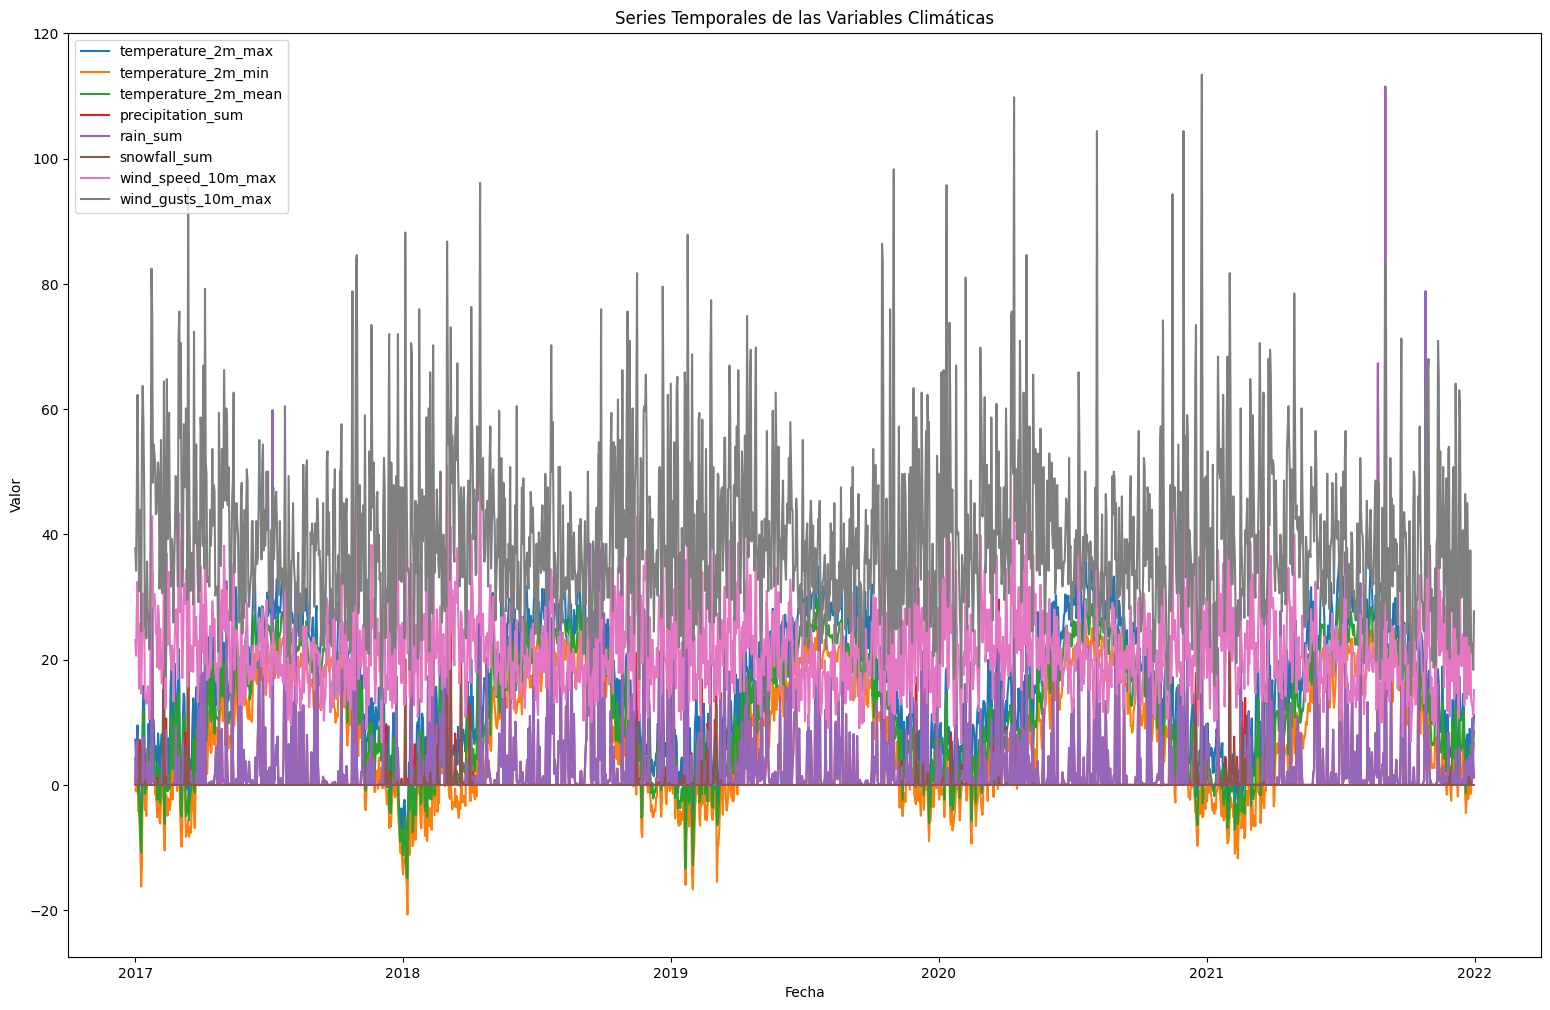

In [11]:
# Gráficos de series temporales
plt.figure(figsize=(19, 12))
for column in df_numerical.columns:
    sns.lineplot(data=df, x='date', y=column, label=column)
plt.title('Series Temporales de las Variables Climáticas')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()

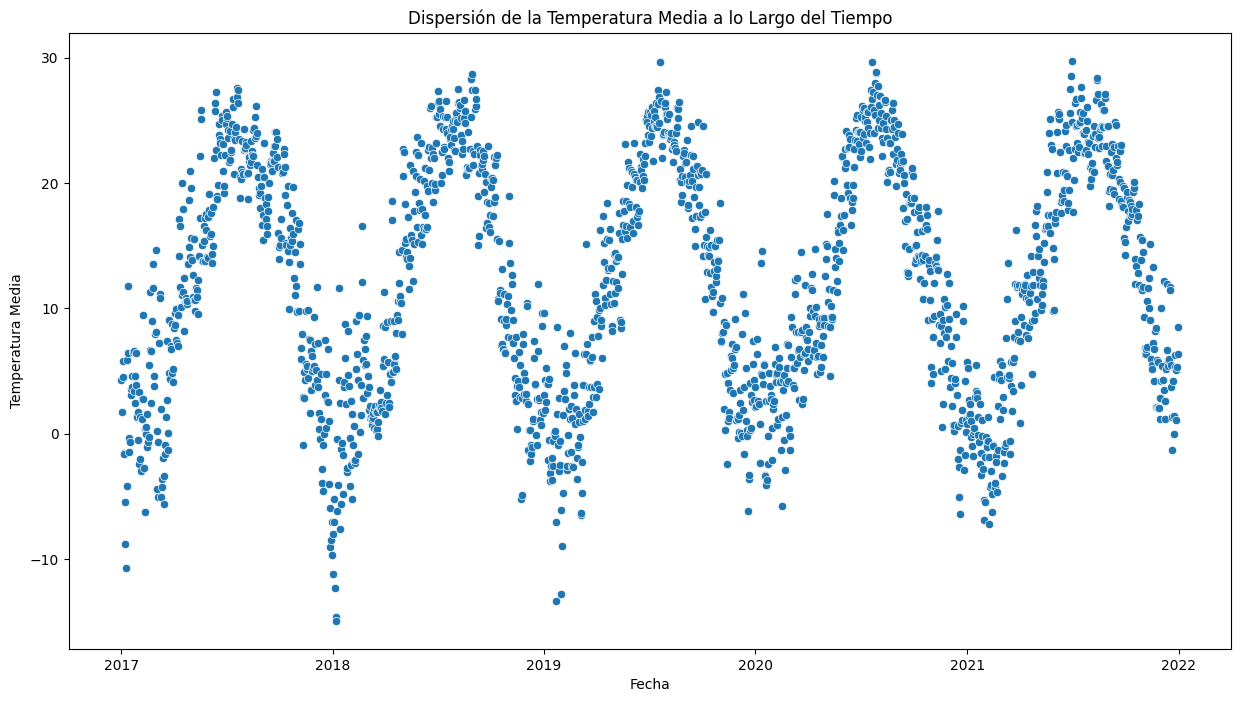

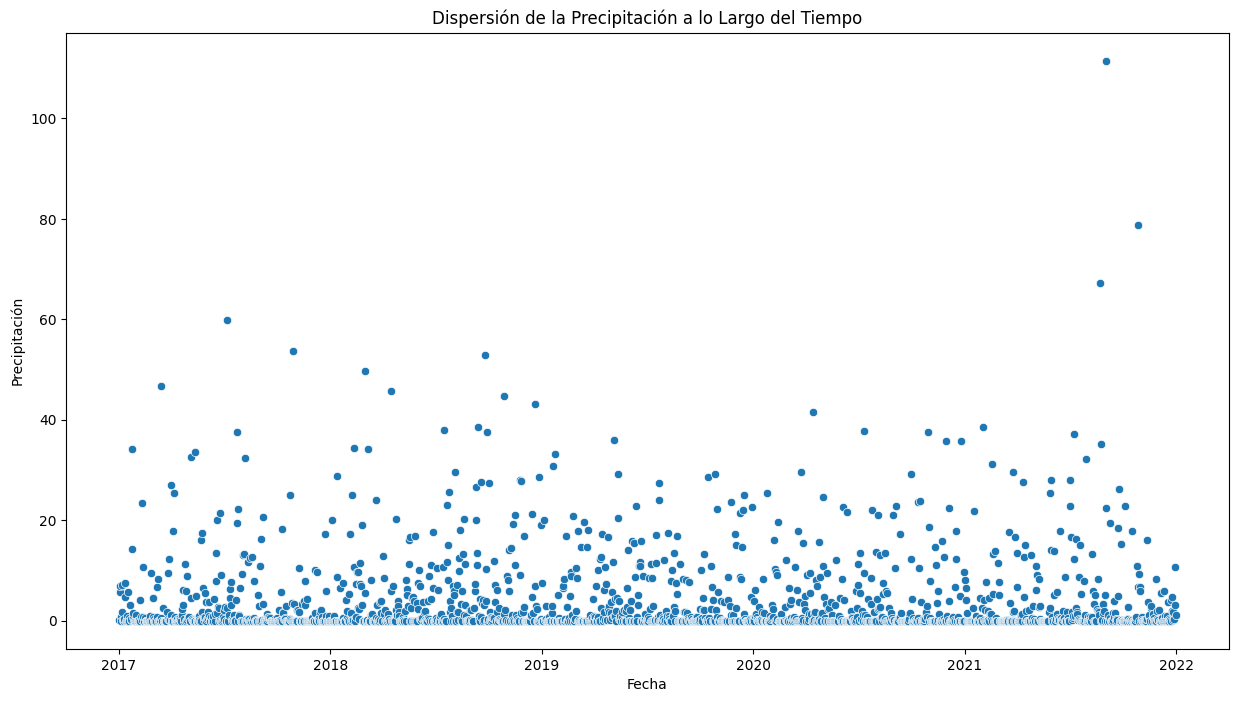

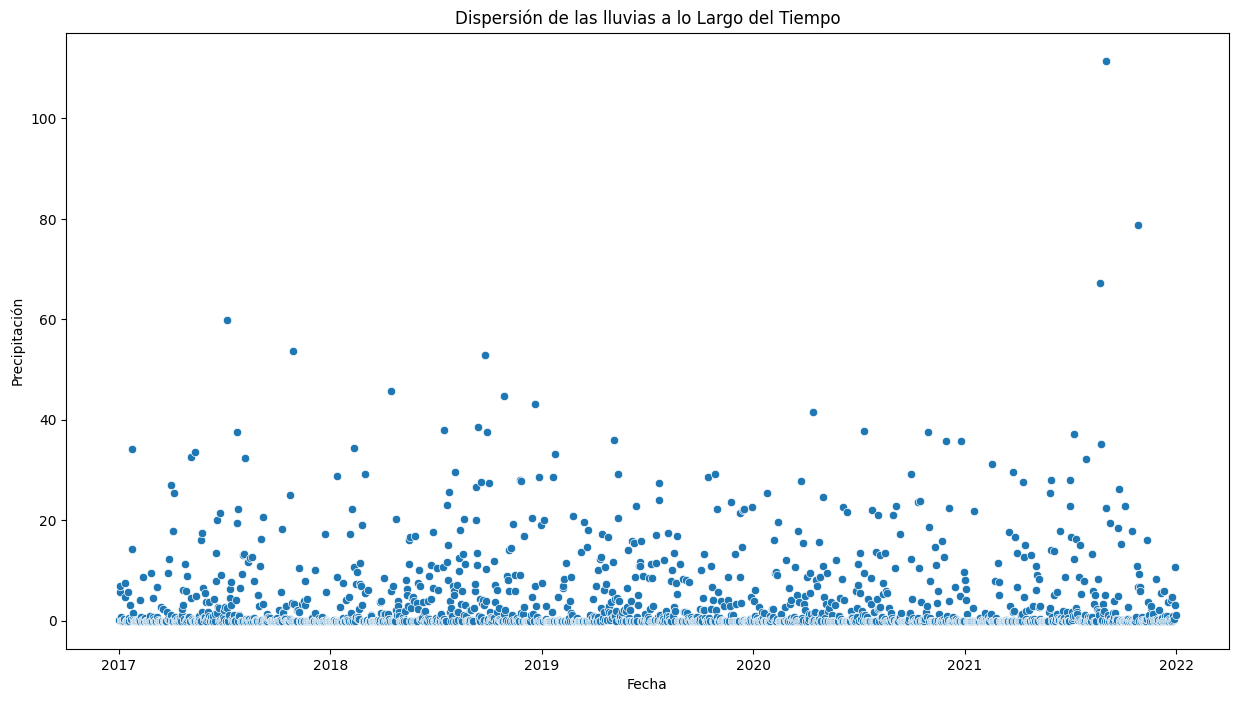

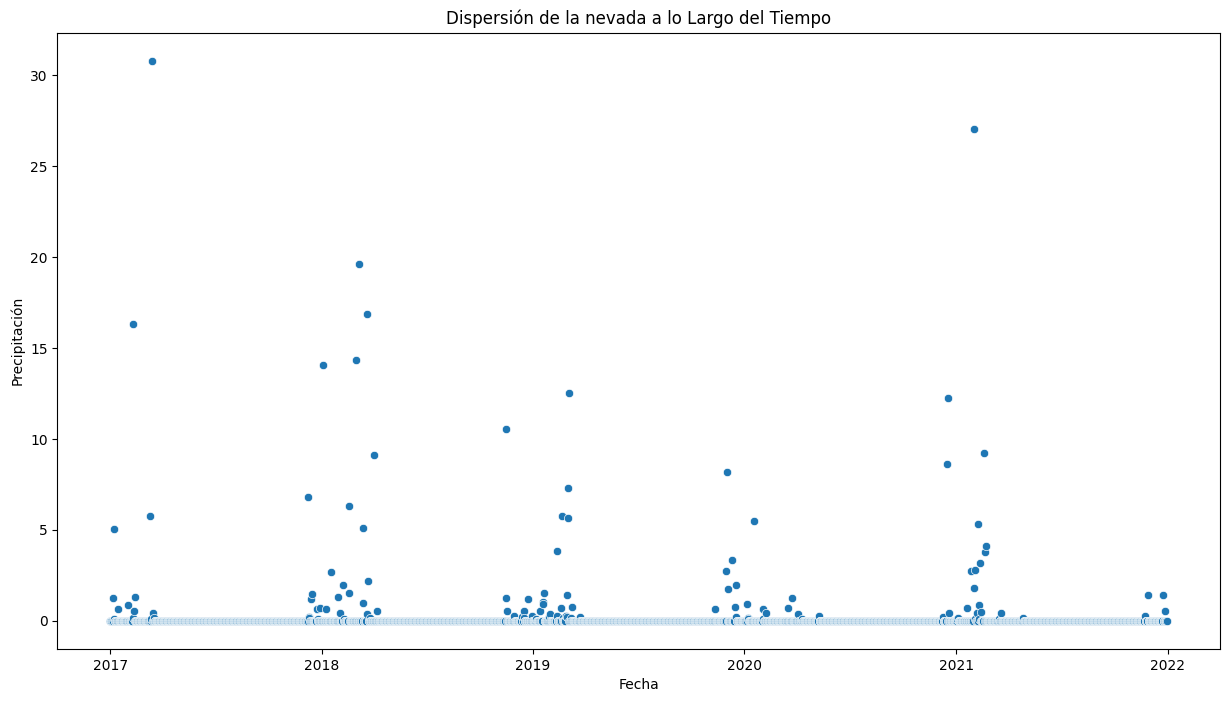

In [12]:
# Gráficos de dispersión con fecha
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='date', y='temperature_2m_mean')
plt.title('Dispersión de la Temperatura Media a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Media')
plt.show()

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='date', y='precipitation_sum')
plt.title('Dispersión de la Precipitación a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precipitación')
plt.show()

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='date', y='rain_sum')
plt.title('Dispersión de las lluvias a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precipitación')
plt.show()

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='date', y='snowfall_sum')
plt.title('Dispersión de la nevada a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precipitación')
plt.show()

# Conclusiones del análisis exploratorio
## Estadísticas Descriptivas:

- Las estadísticas resumidas muestran los valores medios, mínimos, máximos y cuartiles para cada variable.
- Podemos observar la variabilidad de las temperaturas máximas, mínimas y medias, así como la cantidad de precipitaciones, nevadas y velocidad del viento.
## Valores Faltantes:

- No se encuentran valores faltantes, lo que indica que los datos están completos y listos para el análisis.
## Duplicados:

- No hay duplicados en el dataset, lo que asegura la unicidad de los registros diarios.
## Correlaciones:

- Las variables de temperatura están fuertemente correlacionadas entre sí, lo cual es esperado.
- La precipitación y las lluvias estan fuertemente correlacionadas.
- La precipitación y la nevada también muestran correlación con otras variables climáticas.
- La velocidad del viento y las ráfagas máximas de viento tienen una fuerte correlación, lo cual es lógico.
## Outliers:

- Existen outliers en varias variables, especialmente en las medidas de precipitación, nevada y velocidad del viento.
- Estos outliers pueden ser eventos climáticos extremos que merecen una atención adicional.
## Distribuciones (Histogramas):

- Las distribuciones de las variables muestran la frecuencia de los diferentes valores.
- Las temperaturas y las velocidades del viento siguen distribuciones relativamente normales, mientras que las precipitaciones y las nevadas tienen distribuciones sesgadas hacia valores bajos, con algunos picos altos.
## Relaciones Temporales (Series Temporales):

- Las series temporales revelan cómo varían las variables a lo largo del tiempo.
- Se pueden identificar patrones estacionales, como variaciones de temperatura a lo largo del año.
- Las precipitaciones y nevadas también muestran patrones estacionales claros, con aumentos en ciertas épocas del año.
## Dispersión con Fecha:

- Los gráficos de dispersión con fecha muestran cómo varían las temperaturas, precipitaciones y nevadas a lo largo del tiempo.
- Se puede observar una tendencia en las temperaturas, con aumentos y disminuciones a lo largo de los meses.
- Las precipitaciones y nevadas muestran picos en ciertos períodos, reflejando eventos climáticos significativos.